### Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import html
import re
from bs4 import BeautifulSoup

In [3]:
df = pd.read_csv('stackoverflow_nlp_with_answers.csv')
df.head()

,post_id,title,description,tags,creation_date,view_count,tag_matched,accepted_answer
0,42489,How to implement a &quot;related&quot; degree ...,<p>I was going to Ask a Question earlier today...,"algorithm, machine-learning, indexing, nlp, fu...",2008-09-03 20:21:04,456,nlp,<p>One such way to implement such an algorithm...
1,90580,Word frequency algorithm for natural language ...,<p>Without getting a degree in information ret...,"algorithm, nlp, word-frequency",2008-09-18 06:49:26,22651,nlp,"<p>You'll need not one, but several nice algor..."
2,223032,tf-idf and previously unseen terms,"<p><a href=""http://en.wikipedia.org/wiki/Tf-id...","nlp, statistics, tf-idf, oov",2008-10-21 18:53:35,3808,nlp,NaN
3,163923,Methods for Geotagging or Geolabelling Text Co...,<p>What are some good algorithms for automatic...,"algorithm, statistics, nlp, named-entity-recog...",2008-10-02 18:44:32,6592,nlp,"<p>You're looking for a <a href=""https://secur..."
4,195010,How can I split multiple joined words?,"<p>I have an array of 1000 or so entries, with...","string, nlp",2008-10-12 02:37:19,37884,nlp,"<p>The <a href=""http://en.wikipedia.org/wiki/V..."


In [5]:
# Removing entries with NaN which infers that there are no accepted answers
df = df[df['accepted_answer'].notna()]

In [7]:
df.head()

,post_id,title,description,tags,creation_date,view_count,tag_matched,accepted_answer
0,42489,How to implement a &quot;related&quot; degree ...,<p>I was going to Ask a Question earlier today...,"algorithm, machine-learning, indexing, nlp, fu...",2008-09-03 20:21:04,456,nlp,<p>One such way to implement such an algorithm...
1,90580,Word frequency algorithm for natural language ...,<p>Without getting a degree in information ret...,"algorithm, nlp, word-frequency",2008-09-18 06:49:26,22651,nlp,"<p>You'll need not one, but several nice algor..."
3,163923,Methods for Geotagging or Geolabelling Text Co...,<p>What are some good algorithms for automatic...,"algorithm, statistics, nlp, named-entity-recog...",2008-10-02 18:44:32,6592,nlp,"<p>You're looking for a <a href=""https://secur..."
4,195010,How can I split multiple joined words?,"<p>I have an array of 1000 or so entries, with...","string, nlp",2008-10-12 02:37:19,37884,nlp,"<p>The <a href=""http://en.wikipedia.org/wiki/V..."
6,62328,Is there an algorithm that tells the semantic ...,"<p>input: phrase 1, phrase 2</p>\n\n<p>output:...","algorithm, nlp, semantics",2008-09-15 12:26:42,49897,nlp,<hr>\n\n<p>You might want to check out this pa...


In [9]:
def clean_code_and_paths(text):
    if not isinstance(text, str):
        return ''
    # Remove code snippets (backticks or <code> tags)
    text = re.sub(r'<code>.*?<\/code>', '', text)
    text = re.sub(r'`[^`]+`', '', text)
    
    # Remove file paths (e.g., /path/to/file)
    text = re.sub(r'\/[\w\/\.-]+', '', text)
    
    # Remove stack traces
    text = re.sub(r'Traceback \(.*?\):[\s\S]*?(?=(<p>|$))', '', text, flags=re.MULTILINE)
    
    return text


In [11]:
from bs4 import BeautifulSoup

def clean_html(text):
    if not isinstance(text, str):
        return ''
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text(separator=" ")


In [13]:
def lowercase_text(text):
    if not isinstance(text, str):
        return ''
    return text.lower()

In [15]:
def remove_special_characters(text):
    if not isinstance(text, str):
        return ''
    # Remove anything that's not a letter, number, or space
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

In [17]:
# Title: Clean code, paths, stack traces, and HTML
df['title_clean'] = df['title'].apply(clean_code_and_paths).apply(clean_html).apply(lowercase_text).apply(remove_special_characters)

/var/folders/z9/c6z8cmz1419f31tfpn76v4pw0000gn/T/ipykernel_10997/3912947855.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [19]:
# Description: Clean code, paths, stack traces, and HTML
df['description_clean'] = df['description'].apply(clean_code_and_paths).apply(clean_html).apply(lowercase_text).apply(remove_special_characters)

In [21]:
# Accepted Answer: Clean code, paths, stack traces, and HTML
df['accepted_answer_clean'] = df['accepted_answer'].apply(clean_code_and_paths).apply(clean_html).apply(lowercase_text).apply(remove_special_characters)

In [23]:
df['tags_list'] = df['tags'].apply(lambda x: x.split(', '))

### Exploratory Data Analysis

In [31]:
from wordcloud import WordCloud

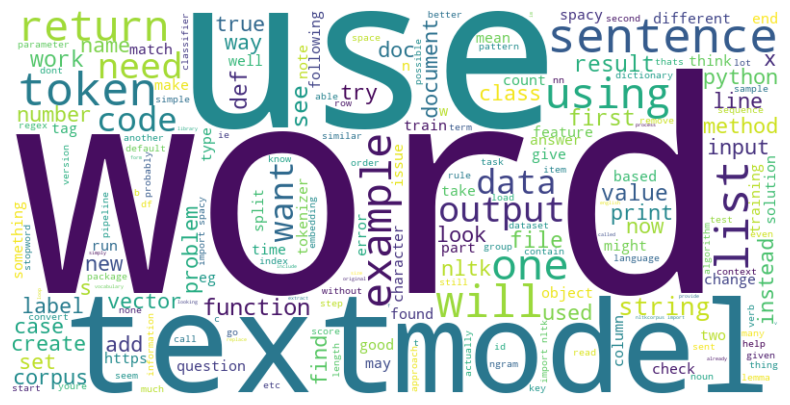

In [33]:
wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['accepted_answer_clean']))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

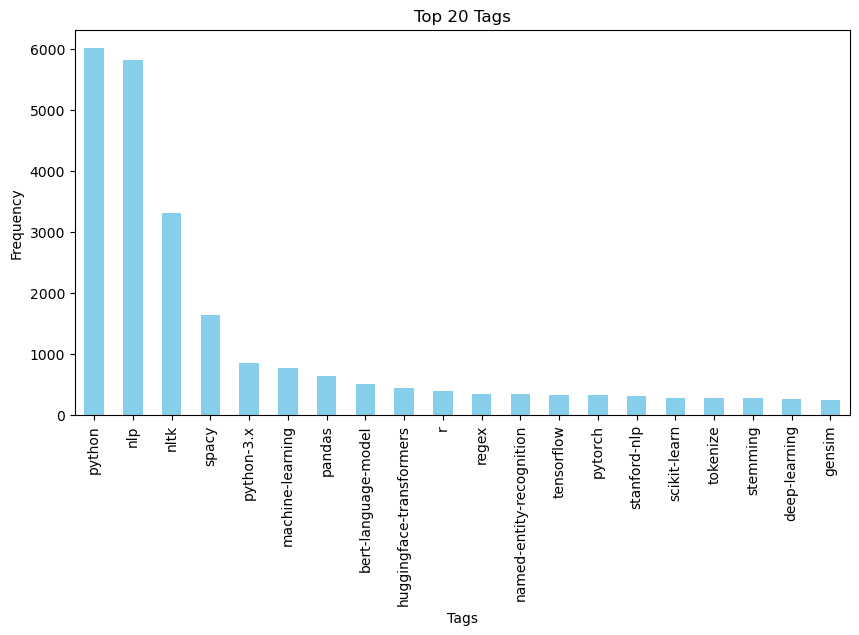

In [37]:
# Filter for the top 20 most frequent tags
top_tags = tag_counts.head(20)
top_tags.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 20 Tags')
plt.ylabel('Frequency')
plt.xlabel('Tags')
plt.show()

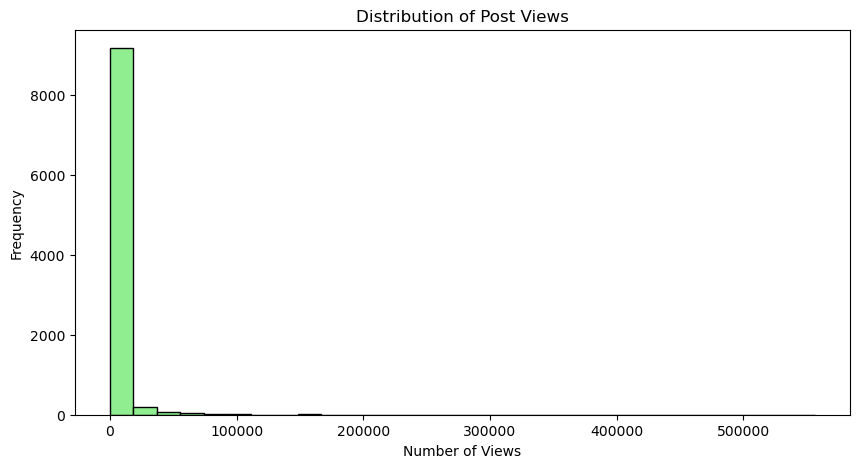

In [43]:
df['view_count'].plot(kind='hist', bins=30, figsize=(10, 5), color='lightgreen', edgecolor='black')
plt.title('Distribution of Post Views')
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.show()

/var/folders/z9/c6z8cmz1419f31tfpn76v4pw0000gn/T/ipykernel_10997/1941713721.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').size().plot(figsize=(10, 5), color='purple')


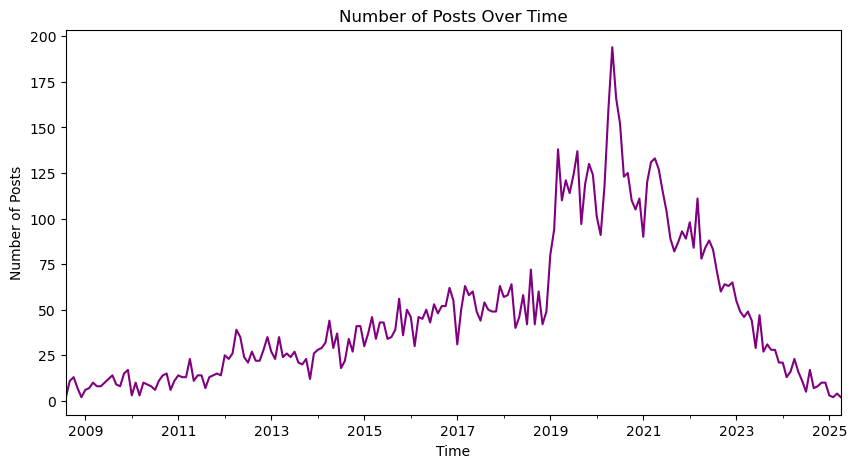

In [47]:
df['creation_date'] = pd.to_datetime(df['creation_date'])
df.set_index('creation_date', inplace=True)
df.resample('M').size().plot(figsize=(10, 5), color='purple')
plt.title('Number of Posts Over Time')
plt.ylabel('Number of Posts')
plt.xlabel('Time')
plt.show()


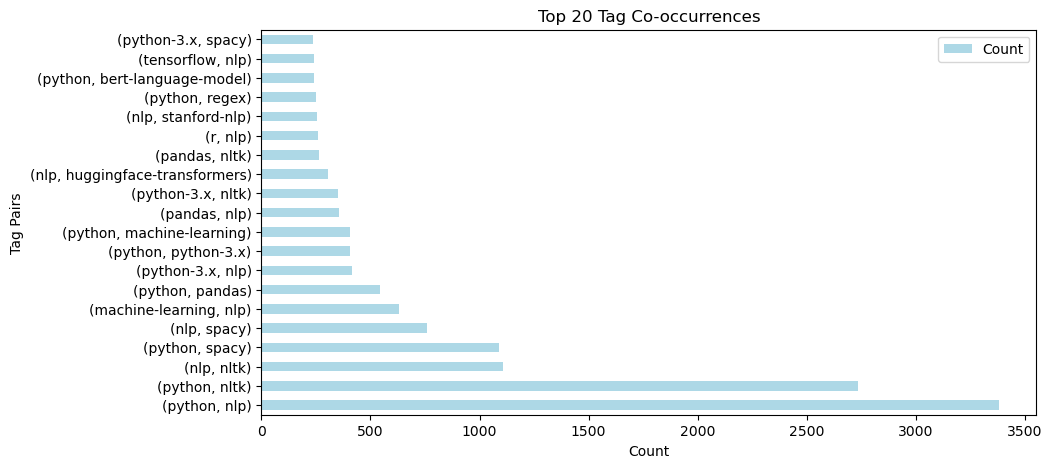

In [51]:
from itertools import combinations
from collections import Counter

# Get all pairs of tags
all_tags = df['tags_list'].dropna()
tag_pairs = []
for tags in all_tags:
    tag_pairs.extend(combinations(tags, 2))

tag_pair_counts = Counter(tag_pairs)
tag_pair_df = pd.DataFrame(tag_pair_counts.items(), columns=['Tags', 'Count'])
tag_pair_df = tag_pair_df.sort_values(by='Count', ascending=False).head(20)

# Visualize the most common tag pairs
tag_pair_df.plot(kind='barh', x='Tags', y='Count', figsize=(10, 5), color='lightblue')
plt.title('Top 20 Tag Co-occurrences')
plt.xlabel('Count')
plt.ylabel('Tag Pairs')
plt.show()


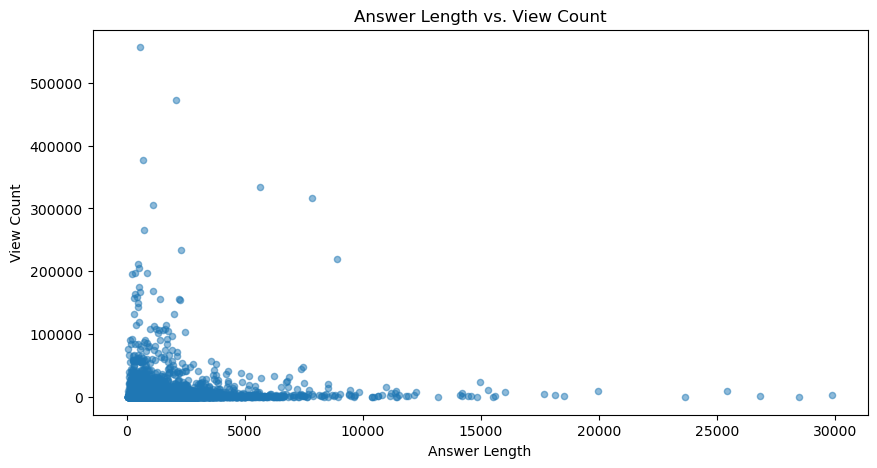

In [53]:
df['answer_length'] = df['accepted_answer'].apply(lambda x: len(str(x)))
df[['answer_length', 'view_count']].plot(kind='scatter', x='answer_length', y='view_count', alpha=0.5, figsize=(10, 5))
plt.title('Answer Length vs. View Count')
plt.xlabel('Answer Length')
plt.ylabel('View Count')
plt.show()

### Preprocessing further in the context of NLP, here for LDA

In [57]:
# combining all the fileds that might define the categories
df['text'] = df['title_clean'] + ' ' + df['description_clean'] + ' ' + df['accepted_answer_clean']

In [59]:
from nltk.corpus import stopwords

# Load stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove special characters and digits, and convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text


In [61]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [ ]:
df.to_csv('data_analysis.csv')